## Scope
In this notebook we give a very brief tutorial which focuses on the mnms python user interface. We'll use a downgraded version of the `d6` region so that all our operations are fast, even though you will probably never use that sim. This way you know how to use mnms in your own analysis code.

## Tutorial

In mnms, we always need to generate a "sqrt-covariance" matrix as a first step; only then can we generate sims:

In [1]:
from mnms import noise_models as nm

tnm = nm.TiledNoiseModel('d6', downgrade=4, union_sources='20210209_sncut_10_aggressive', notes='my_first_model')

 0.16  5.06  5.07 Loading mask for d6
 0.01  5.06  5.07 Downgrading mask
 0.66  5.06  5.10 Loading, downgrading ivar for d6


In [2]:
wnm = nm.WaveletNoiseModel('d6', downgrade=4, union_sources='20210209_sncut_10_aggressive', notes='my_first_model')

 0.02  5.06  5.10 Loading mask for d6
 0.01  5.06  5.10 Downgrading mask
 0.31  5.06  5.10 Loading, downgrading ivar for d6
 0.01  5.06  5.10 Getting correction factors


Now we need to make our noise model. Because they are the slowest step to make, and take up a lot of space, by default they are written to disk. The idea is that outside of testing/development, you only need to ever run this command once (per data-release, array-set, other parameters, etc):

In [3]:
tnm.get_model()

Model not found on disk, generating instead
 1.67  6.38  6.45 Loading, inpainting, downgrading imap for d6
 6.11 12.33 12.45 Generating noise model


In [4]:
wnm.get_model()

Model not found on disk, generating instead
 1.60 12.37 12.51 Loading, inpainting, downgrading imap for d6
54.44 16.59 17.94 Generating noise model


To save you from accidentally regenerating the exact same model again, the argument `check_on_disk` is `True` by default. If I rerun `get_model`, it will find that the model is on-disk, and return nothing (you can also `keep` the model in memory, stored as an instance attribute, in this case, if you want):

In [5]:
tnm.get_model()
wnm.get_model()

That was fast, and that's because the models are on-disk:

In [11]:
ls /scratch/gpfs/zatkins/data/ACTCollaboration/mnms/covmats/*my_first_model*

/scratch/gpfs/zatkins/data/ACTCollaboration/mnms/covmats/d6_dr5_masks_20200723_bin_apod_cal_True_dg4_ip20210209_sncut_10_aggressive_lamb1.3_lmax2700_my_first_model_set0.hdf5
/scratch/gpfs/zatkins/data/ACTCollaboration/mnms/covmats/d6_dr5_masks_20200723_bin_apod_cal_True_dg4_ip20210209_sncut_10_aggressive_lamb1.3_lmax2700_my_first_model_set1.hdf5
/scratch/gpfs/zatkins/data/ACTCollaboration/mnms/covmats/d6_dr5_masks_20200723_bin_apod_cal_True_dg4_ip20210209_sncut_10_aggressive_lamb1.3_lmax2700_my_first_model_set2.hdf5
/scratch/gpfs/zatkins/data/ACTCollaboration/mnms/covmats/d6_dr5_masks_20200723_bin_apod_cal_True_dg4_ip20210209_sncut_10_aggressive_lamb1.3_lmax2700_my_first_model_set3.hdf5
/scratch/gpfs/zatkins/data/ACTCollaboration/mnms/covmats/d6_dr5_masks_20200723_bin_apod_cal_True_dg4_ip20210209_sncut_10_aggressive_w4.0_h4.0_lsmooth400_lmax5400_my_first_model.fits


Note, this trick won't work if you give a model a different `notes` parameter. E.g., `my_second_model` is considered a totally distinct noise model from `my_first_model`, even if all the "scientific" parameters are the same.

Now we can make sims. Sims are always made of single splits at a time. To do so, we must load the "sqrt-covariance" matrix from disk, so that we can sample from it, so make sure to have enough memory on-hand to do this. These files are only loaded once -- they are stored in the object instance, so that future calls to `get_sim` do not have to load from disk. There is also a similar `check_on_disk` parameter to prevent users from generating the same sim twice (by default this is True).

By default, these are ***not*** saved to disk (but they can be, if desired). We need to tell `get_sim` which split and map number we want to make. The map number is used in getting a unique random seed (and if the sims is written to disk, will be stored in the filename):

In [7]:
tmap_s3_n123 = tnm.get_sim(3, 123, verbose=True)

Sim not found on disk, generating instead
Model not loaded, loading from disk
Number of Unmasked Tiles: 12
Number of Arrays: 1
Number of Pols.: 3
Tile shape: (240, 240)
Seed: [3, 123, 0, 714139922, 0, 0, 0]
 1.17 16.34 17.94 Generating noise sim


In [8]:
wmap_s3_n123 = wnm.get_sim(3, 123, verbose=True)

Sim not found on disk, generating instead
Model for split 3 not loaded, loading from disk
 4.99 16.87 17.94 Generating noise sim


As noted in the README, these sims always have shape (num_arrays, num_splits, num_pol, ny, nx), even if some of these axes have dimension 1. Because we generate sims per split, `num_splits=1` always. Let's take a look! 

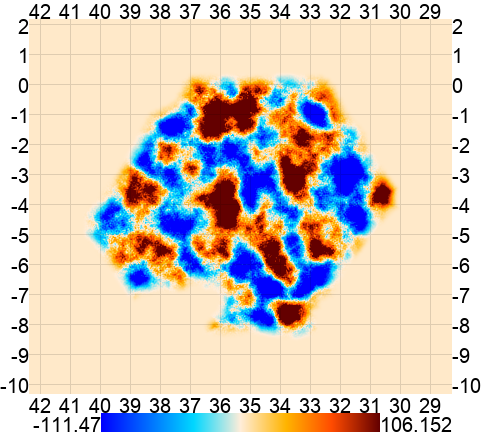

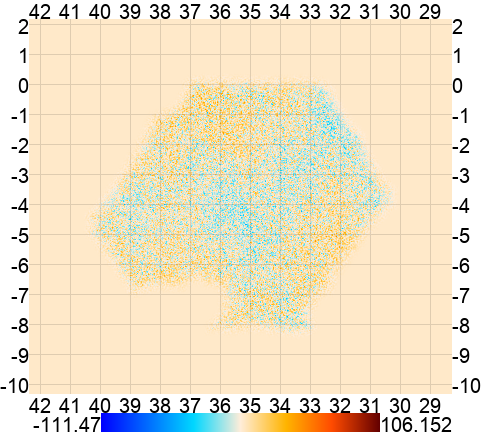

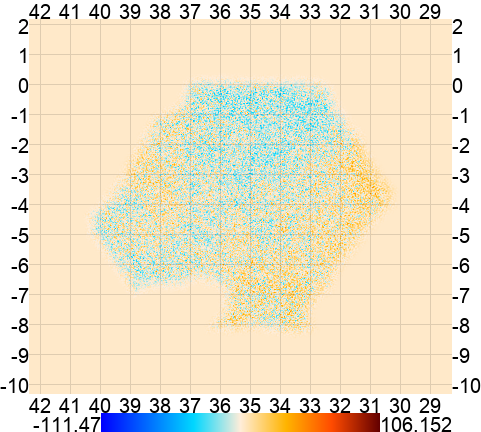

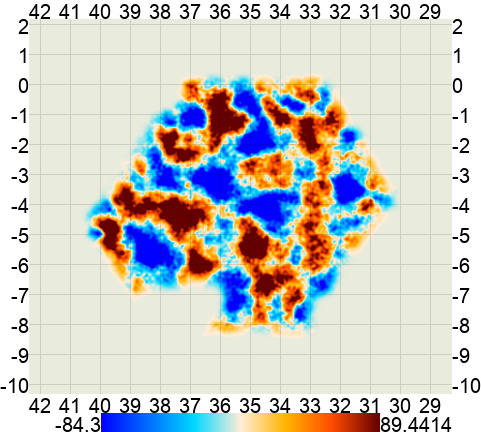

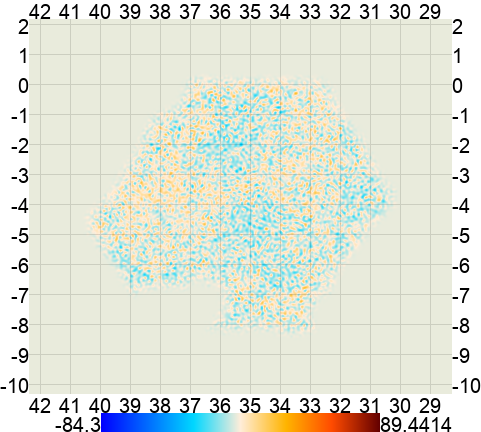

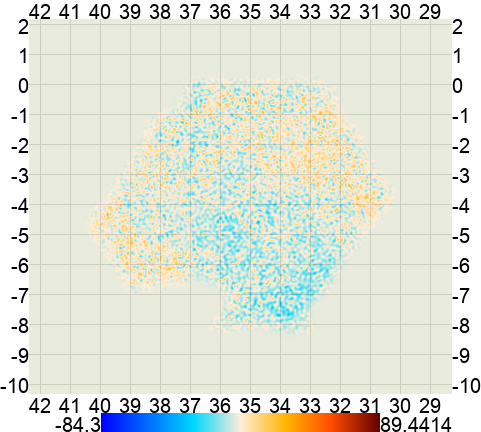

In [9]:
from pixell import enplot

enplot.pshow(tmap_s3_n123, colorbar=True)
enplot.pshow(wmap_s3_n123, colorbar=True)